In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
"""
Question 1
You are a data analyst at an e-commerce company. Your task is to analyze sales data, clean and process it, perform statistical analysis, 
and generate visual insights to help the business make informed decisions. 
    1. Use your roll number as the random seed to generate unique data for each student. 
    2. Follow the ques ons step by step, as each part builds upon the previous one. 
    3. Submit the assignment as a Jupyter Notebook (.ipynb) with: 
             Well-documented code and clear comments. 
             Markdown explana ons for each step. 
             Screenshots of the plots and outputs. 
"""

'\nQuestion 1\nYou are a data analyst at an e-commerce company. Your task is to analyze sales data, clean and process it, perform statistical analysis, \nand generate visual insights to help the business make informed decisions. \n    1. Use your roll number as the random seed to generate unique data for each student. \n    2. Follow the ques ons step by step, as each part builds upon the previous one. \n    3. Submit the assignment as a Jupyter Notebook (.ipynb) with: \n            \uf0b7 Well-documented code and clear comments. \n            \uf0b7 Markdown explana ons for each step. \n            \uf0b7 Screenshots of the plots and outputs. \n'

In [3]:
"""
Part I: Randomized Sales Data Generation (NumPy) 
    1. Initialize Random Seed 
    2. Generate Sales Data 
         Create a NumPy array of random sales data for 12 months (shape = (12, 4)), where each column represents a product category: 
             Electronics, Clothing, Home & Kitchen, Sports. 
         Sales values should be between 1000 and 5000 units per month. 
         The range should be randomized using the seed. 
    3. Convert to DataFrame 
         Convert the cleaned NumPy array into a Pandas DataFrame with: 
            i. Columns: Electronics, Clothing, Home & Kitchen, Sports 
            ii. Index: Months from Jan to Dec 
"""
roll_no = 102317045

np.random.seed(roll_no)

sales = np.random.randint(1000, 5000, size=(12, 4))

product = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales_df = pd.DataFrame(sales, columns=product, index=months)


In [4]:
"""
Part II: Data Manipulation and Analysis (Pandas) 
    1. Display the first 5 rows and summary statistics of the DataFrame. 
    2. Calculate the total sales per category and total sales per month. 
    3. Calculate the average sales growth between consecutive months for each category. 
    4. Add the following columns to the DataFrame: 
         Total Sales: Sum of all categories per month. 
         Growth Rate: Percentage change in Total Sales from the previous month. 
    5. Apply a randomized discount: 
         If your roll number is even, apply a 10% discount to the Electronics category. 
         If odd, apply a 15% discount to the Clothing category. 
"""

sales_df.head()

,Electronics,Clothing,Home & Kitchen,Sports
Jan,2799,4903,4752,4328
Feb,1913,2559,2608,1323
Mar,3722,2028,2417,3108
Apr,1232,3359,3785,2749
May,4044,4380,3477,3764


In [5]:
sales_df.describe()

,Electronics,Clothing,Home & Kitchen,Sports
count,12.000000,12.000000,12.000000,12.000000
mean,2685.083333,3513.250000,3248.916667,2664.166667
std,950.685060,992.486879,1115.741780,1299.780389
min,1155.000000,2010.000000,1537.000000,1003.000000
25%,2180.750000,3045.000000,2371.250000,1431.750000
50%,2799.000000,3337.000000,3631.000000,2928.500000
75%,3048.500000,4395.750000,4022.500000,3533.000000
max,4044.000000,4903.000000,4752.000000,4764.000000


In [6]:
print("Total sales per category: ")
print(sales_df.sum(axis=0))
print()
print("Total sales per month: ")
print(sales_df.sum(axis=1))

Total sales per category: 
Electronics       32221
Clothing          42159
Home & Kitchen    38987
Sports            31970
dtype: int64

Total sales per month: 
Jan    16782
Feb     8403
Mar    11275
Apr    11125
May    15665
Jun    11540
Jul     8610
Aug    15576
Sep    13486
Oct     9324
Nov    12003
Dec    11548
dtype: int64


In [7]:
avg_growth_rate = sales_df.mean().pct_change() * 100
print(avg_growth_rate)

Electronics            NaN
Clothing          0.308432
Home & Kitchen   -0.075239
Sports           -0.179983
dtype: float64


In [8]:
growth_rate = sales_df.pct_change() * 100 

sales_df['Total Sales'] = sales_df.sum(axis=1)
sales_df['Growth Rate'] = (sales_df['Total Sales'].pct_change()) * 100

if roll_no % 2 == 0:
    sales_df['Electronics'] = sales_df['Electronics'] * 0.9
else:
    sales_df['Clothing'] = sales_df['Clothing'] * 0.85

sales_df.head(12)

,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate
Jan,2799,4167.55,4752,4328,16782,NaN
Feb,1913,2175.15,2608,1323,8403,-49.928495
Mar,3722,1723.80,2417,3108,11275,34.178270
Apr,1232,2855.15,3785,2749,11125,-1.330377
May,4044,3723.00,3477,3764,15665,40.808989
Jun,4002,3776.55,1627,1468,11540,-26.332589
Jul,2270,2725.95,1537,1596,8610,-25.389948
Aug,2824,4030.70,4554,3456,15576,80.905923
Sep,2643,1708.50,4069,4764,13486,-13.418079
Oct,2818,2778.65,2234,1003,9324,-30.861634


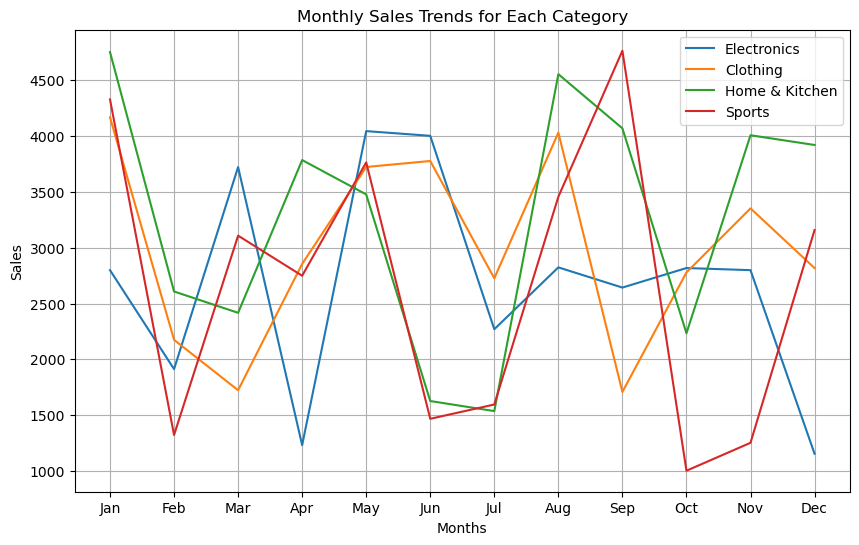

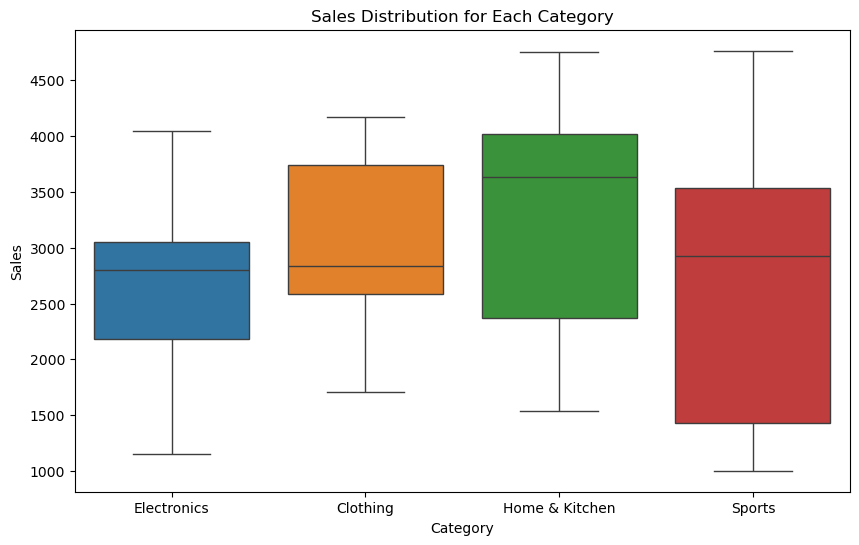

In [9]:
"""
Part III: Visualizations (Matplotlib and Seaborn) 
    1. Plot monthly sales trends for each category using line plots. 
    2. Create the following plots: 
         Box plots to show the sales distribution for each category. 
"""
plt.figure(figsize=(10, 6))

for category in product:
    plt.plot(sales_df.index, sales_df[category], label=category)

plt.title('Monthly Sales Trends for Each Category')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_df[product])
plt.title('Sales Distribution for Each Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [10]:
"""
Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]]) 
    i. Find element-wise absolute value 
    ii. Find the 25th, 50th, and 75th percentile of flattened array, for each column, for each row. 
    iii. Mean, Median and Standard Deviation of flattened array, of each column, and each row.
"""

array = np.array([[1, -2, 3],[-4, 5, -6]])
print("Original array              : ")
print(array)
print("Absolute Values             : ")
print(np.abs(array))
print()
print("25th percentile of flattened array: ", np.percentile(array.flatten(), 25))
print("50th percentile of flattened array: ", np.percentile(array.flatten(), 50))
print("75th percentile of flattened array: ", np.percentile(array.flatten(), 75))
print()
print("25th percentile of array for each column: ", np.percentile(array, 25, axis=0))
print("50th percentile of array for each column: ", np.percentile(array, 50, axis=0))
print("75th percentile of array for each column: ", np.percentile(array, 75, axis=0))
print()
print("25th percentile of array for each row: ", np.percentile(array, 25, axis=1))
print("50th percentile of array for each row: ", np.percentile(array, 50, axis=1))
print("75th percentile of array for each row: ", np.percentile(array, 75, axis=1))
print()
print("Mean of flattened array: ", np.mean(array.flatten()))
print("Median of flattened array: ", np.median(array.flatten()))
print("Standard Deviation of flattended array: ", np.std(array.flatten()))
print()
print("Mean of array for each column: ", np.mean(array, axis=0))
print("Median of array for each column: ", np.median(array, axis=0))
print("Standard Deviation of array for each column: ", np.std(array, axis=0))
print()
print("Mean of array for each row: ", np.mean(array, axis=1))
print("Median of array for each row: ", np.median(array, axis=1))
print("Standard Deviation of array for each row: ", np.std(array, axis=1))

Original array              : 
[[ 1 -2  3]
 [-4  5 -6]]
Absolute Values             : 
[[1 2 3]
 [4 5 6]]

25th percentile of flattened array:  -3.5
50th percentile of flattened array:  -0.5
75th percentile of flattened array:  2.5

25th percentile of array for each column:  [-2.75 -0.25 -3.75]
50th percentile of array for each column:  [-1.5  1.5 -1.5]
75th percentile of array for each column:  [-0.25  3.25  0.75]

25th percentile of array for each row:  [-0.5 -5. ]
50th percentile of array for each row:  [ 1. -4.]
75th percentile of array for each row:  [2.  0.5]

Mean of flattened array:  -0.5
Median of flattened array:  -0.5
Standard Deviation of flattended array:  3.8622100754188224

Mean of array for each column:  [-1.5  1.5 -1.5]
Median of array for each column:  [-1.5  1.5 -1.5]
Standard Deviation of array for each column:  [2.5 3.5 4.5]

Mean of array for each row:  [ 0.66666667 -1.66666667]
Median of array for each row:  [ 1. -4.]
Standard Deviation of array for each row:  [2

In [11]:
"""
Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).  
    i. Find floor, ceiling and truncated value, rounded values
"""

a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])
print("Original array              : ", a)
print("Floor                       : ", np.floor(a))
print("Ceiling                     : ", np.ceil(a))
print("Truncated                   : ", np.trunc(a))
print("Rounded                     : ", np.round(a))

Original array              :  [-1.8 -1.6 -0.5  0.5  1.6  1.8  3. ]
Floor                       :  [-2. -2. -1.  0.  1.  1.  3.]
Ceiling                     :  [-1. -1. -0.  1.  2.  2.  3.]
Truncated                   :  [-1. -1. -0.  0.  1.  1.  3.]
Rounded                     :  [-2. -2. -0.  0.  2.  2.  3.]


In [12]:
"""
Question 4:
WAP to swap two elements in a list in Python Using a Temporary Variable. 
"""

list_1 = [10,20,30,40,50,60,70,80]
print("Your list is: ",list_1)
index_1 = int(input("Enter index of first element to swap: "))
index_2 = int(input("Enter index of second element to swap: "))
temp = list_1[index_1]
list_1[index_1] = list_1[index_2]
list_1[index_2] = temp
print("Your updated list is: ",list_1)

Your list is:  [10, 20, 30, 40, 50, 60, 70, 80]


Enter index of first element to swap:  2
Enter index of second element to swap:  5


Your updated list is:  [10, 20, 60, 40, 50, 30, 70, 80]


In [13]:
"""
Question 5:
Write a Python program to swap two elements in a set by converting it to a list first. 
"""

def swap_elements_in_set(s, index1, index2):
    s_list = list(s)
    s_list[index1], s_list[index2] = s_list[index2], s_list[index1]
    return set(s_list)

set_1 = {10, 20, 30, 40, 50}
print("Your set is: ",set_1)
index_1 = int(input("Enter index of first element to swap: "))
index_2 = int(input("Enter index of second element to swap: "))
list_2 = [item for item in set_1]
list_2[index_1], list_2[index_2] = list_2[index_2], list_2[index_1]
set_1 = set(list_2)
print("Your updated set is: ", set_1)

Your set is:  {50, 20, 40, 10, 30}


Enter index of first element to swap:  0
Enter index of second element to swap:  2


Your updated set is:  {40, 10, 50, 20, 30}
